<div style="text-align: center;">

# **Text Classification for Spam**

</div>

<div align="center">
 <img src="https://storage.googleapis.com/gweb-cloudblog-publish/images/image4_v2LFcq0.max-1200x1200.png" alt="drawing" width="1000"/>
</div>


# **1. Business Objective**

## **Identify the business task and translate it into an NLP Task**

This project aims to develop a robust system for identifying spam emails, translating the business need into an NLP task. The goal is to differentiate between legitimate messages and spam, thereby reducing time wasted on malicious emails.

## **Consider key stakeholders**

- **IT Department**: Responsible for maintaining and improving email filtering systems.
- **Employees**: Will benefit from a cleaner inbox and reduced time spent dealing with spam.
- **Company Management**: Interested in improving overall productivity and reducing security risks associated with spam emails (e.g., phishing scams).

## **Objectives**

- **Obtain the dataset**: Gather a suitable dataset of email messages labeled as spam or legitimate.
- **Set up the environment and download all dependencies**: Ensure all necessary software and libraries are installed.
- **Pre-process the data**: Clean and preprocess the email data, including tasks such as removing HTML tags, stopwords, and punctuation.
- **Perform feature engineering**: Extract relevant features from the text data, such as word frequency, n-grams, and TF-IDF scores.
- **Model selection**: Choose appropriate machine learning or deep learning models for text classification, considering factors such as performance and scalability.
- **Training and testing the model**: Train the selected model on the preprocessed data and evaluate its performance using appropriate metrics.
- **Implement the final model and test on emails**: Deploy the trained model to classify incoming emails as spam or legitimate and assess its effectiveness in a real-world scenario.



# **2. Data Exploration.**
### Key tasks:
* Data Collection: Download data and store it appropriately.
* Identify how it’s organized.
* Preliminary data exploration.

### Data Collection
Data has been downloaded from [UC Irvine Machine Learning repository](https://archive.ics.uci.edu/dataset/94/spambase). Local copies have been stored here on github.

### Preliminary data exploration

In [1]:
# Setting the environment by import all the required modules and libraries
import os
import requests
import re

# Data manipulation and data preprocessign libraries and modules
import pandas as pd
import numpy as np

# Data pre-processing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Feature engineering
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import RFE

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Metrices
from sklearn.metrics import accuracy_score

# Visualizations
import seaborn as sns
import matplotlib.pyplot as plt

# Dataset
!pip install ucimlrepo

### Step 1: System for fetching data continuously.
* For retraining models

In [2]:
import pandas as pd
import requests
import re
from ucimlrepo import fetch_ucirepo

def fetch_current_version():
    """Fetch the current dataset version from the GitHub repository."""
    url = "https://raw.githubusercontent.com/uci-ml-repo/ucimlrepo/main/setup.py"
    response = requests.get(url)
    
    if response.status_code == 200:
        version_match = re.search(r"version='(.*?)'", response.text)
        if version_match:
            return version_match.group(1)
    return None

def fetch_and_load_dataset():
    """Fetch and load the dataset."""
    spambase = fetch_ucirepo(id=94)
    
    # Convert data to DataFrames
    data_df = pd.DataFrame(spambase.data.features)
    target_df = pd.DataFrame(spambase.data.targets, columns=["Class"])
    
    # Combine features and target variable into a single DataFrame
    df = pd.concat([data_df, target_df], axis=1)
    
    return df

def main():
    """Main function to automate the data retrieval process and use the DataFrame directly."""
    current_version = fetch_current_version()
    if not current_version:
        print("Failed to fetch the current version from the repository.")
        return None
    
    print(f"Current dataset version: {current_version}")
    
    # Fetch and load the dataset
    df = fetch_and_load_dataset()
    
    # Display the first few rows of the dataset
    print(df.head())
    
    return df

# Execute the main function and load the DataFrame
df = main()

# Continue with your data processing and model training
if df is not None:
    # Example: Show the first few rows of the DataFrame
    print(df.head())

Current dataset version: 0.0.7
   word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
0            0.00               0.64           0.64           0.0   
1            0.21               0.28           0.50           0.0   
2            0.06               0.00           0.71           0.0   
3            0.00               0.00           0.00           0.0   
4            0.00               0.00           0.00           0.0   

   word_freq_our  word_freq_over  word_freq_remove  word_freq_internet  \
0           0.32            0.00              0.00                0.00   
1           0.14            0.28              0.21                0.07   
2           1.23            0.19              0.19                0.12   
3           0.63            0.00              0.31                0.63   
4           0.63            0.00              0.31                0.63   

   word_freq_order  word_freq_mail  ...  char_freq_;  char_freq_(  \
0             0.00            0.00  ... 

In [3]:
df.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,Class
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [4]:
df.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,Class
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


The dataset is high-dimensional,having a total of 57 features and the target variable: "Class". Each feature describes the the frequency of words or characters in the text.
Having a dataset that is high-dimensional poses several challenges such as computational complexity, and overfitting
As a result, I will have to address this issue later in the analysis using methods such as dimensional reduction or feture selection

In [5]:
data_type = df.dtypes
data_types_counts = data_type.value_counts()

print('Number of columns with each data type: ')
print(data_types_counts)

Number of columns with each data type: 
float64    55
int64       3
Name: count, dtype: int64


In [6]:
# Summary statistics
df.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,Class
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,...,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,...,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3.706000,43.000000,266.000000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.000000


In [7]:
# Calculate skewness and kurtosis for all numerical columns
skewness = df.skew()
kurtosis = df.kurtosis()

# Create DataFrames for skewness and kurtosis
skew_df = pd.DataFrame(skewness, columns=['Skewness'])
kurtosis_df = pd.DataFrame(kurtosis, columns=['Kurtosis'])

# Concatenate skewness and kurtosis DataFrames
summary_df = pd.concat([skew_df, kurtosis_df], axis=1)

# Display the summary DataFrame
print(summary_df)

                             Skewness     Kurtosis
word_freq_make               5.675639    49.305064
word_freq_address           10.086811   105.647472
word_freq_all                3.009249    13.308743
word_freq_3d                26.227744   726.451538
word_freq_our                4.747126    37.941169
word_freq_over               5.956953    68.445258
word_freq_remove             6.765580    75.413439
word_freq_internet           9.724848   169.162876
word_freq_order              5.226067    46.940256
word_freq_mail               8.487810   161.214641
word_freq_receive            5.510250    39.650945
word_freq_will               2.867354    12.550747
word_freq_people             6.955548    84.941822
word_freq_report            11.754645   229.201271
word_freq_addresses          6.971041    57.727676
word_freq_free              10.763594   196.424975
word_freq_business           5.688642    45.673775
word_freq_email              5.413754    47.961674
word_freq_you                1.

The dataset exhibits notable skewness and kurtosis in several features, indicating non-normal distributions and potential outliers. Features such as 'word_freq_3d', 'word_freq_parts', and 'char_freq_#' display particularly high positive skewness and kurtosis, suggesting heavy tails and potential outliers. Further exploration and preprocessing may be needed to address these characteristics effectively

In [8]:
# Identify columns with missing values
df.isnull().sum()

word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
word_freq_telnet              0
word_fre

In [9]:
df.duplicated().sum()

391

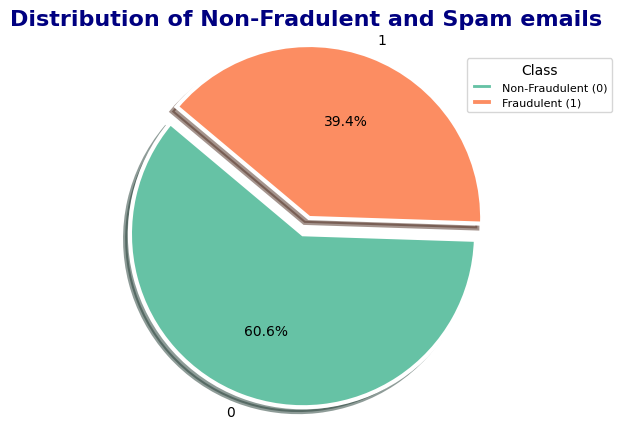

In [10]:
class_counts = df['Class'].value_counts()

# Colors for the pie chart
colors = ['#66c2a5', '#fc8d62']

# Explode the second slice (1) to highlight it
explode = (0, 0.1)

# Create a pie chart
plt.figure(figsize=(5, 5))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=140, colors=colors, explode=explode, shadow=True, wedgeprops={'linewidth': 3, 'edgecolor': 'white'})
plt.title('Distribution of Non-Fradulent and Spam emails', fontsize=16, fontweight='bold', color='navy')

# Add a legend with custom formatting
plt.legend(title='Class', loc='upper left', labels=['Non-Fraudulent (0)', 'Fraudulent (1)'], fontsize=8, bbox_to_anchor=(0.9, 0.95))

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Show the plot
plt.show()


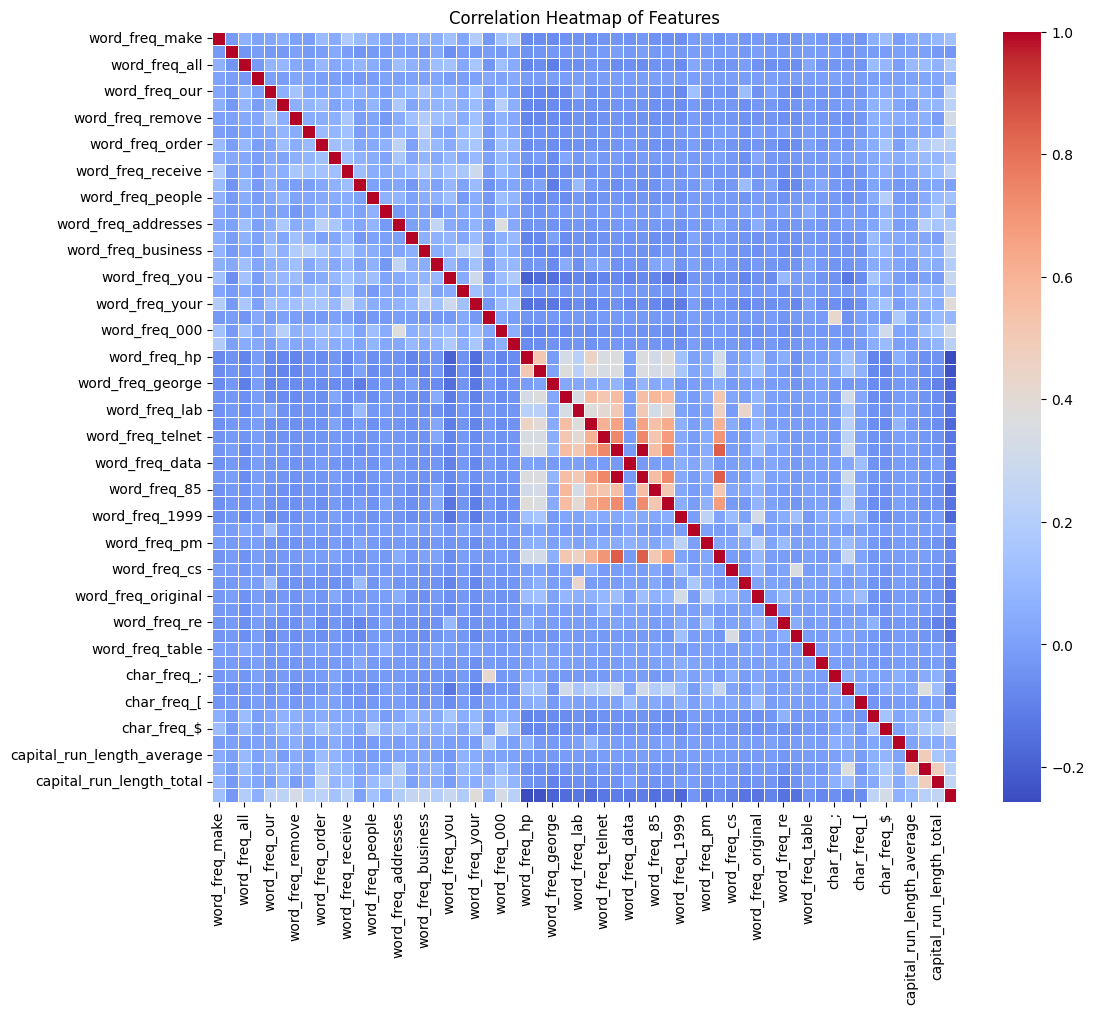

In [11]:
# Compute the correlation matrix
correlation_matrix = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, fmt=".2f", linewidths=0.5)

# Add title
plt.title('Correlation Heatmap of Features')

# Show the plot
plt.show()


# **3. Data Preprocessing**

### Key tasks (Where applicable):
* Handling missing values
* Data transformation
* Correct incorrect data format

In [12]:
#### Missing values

#### The function will return features that have missing values.(If any)

def features_with_missing_values(df):
    """
    Returns:
        > list of features that contains missing values
    
    Parameter:
        > df
    
    Returns:
        > list of features
    
    """
    return df.columns[df.isnull().any()].tolist()

missingFeatures = features_with_missing_values(df)
print(f"Features with missing values: {missingFeatures}")

Features with missing values: []


The list is empty meaning, there are no missing values in the dataset

### Handling non-normal distribution of the data
### In the preliminary data analysis, there appeared to be a significant presence of skeness and kurtosis

In [13]:
df

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,Class
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88,0
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14,0
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118,0
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78,0


In [14]:
"""
# Step 1: Calculate the Interquartile Range (IQR)
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Step 2: Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Step 3: Identify outliers
outliers = (df < lower_bound) | (df > upper_bound)

# Step 4: Remove outliers from the dataset
df = df[~outliers.any(axis=1)]

df
"""

 

# Step 5: Verify results
# Check descriptive statistics, visualize data distributions, and assess model performance


'\n# Step 1: Calculate the Interquartile Range (IQR)\nQ1 = df.quantile(0.25)\nQ3 = df.quantile(0.75)\nIQR = Q3 - Q1\n\n# Step 2: Define lower and upper bounds for outliers\nlower_bound = Q1 - 1.5 * IQR\nupper_bound = Q3 + 1.5 * IQR\n\n# Step 3: Identify outliers\noutliers = (df < lower_bound) | (df > upper_bound)\n\n# Step 4: Remove outliers from the dataset\ndf = df[~outliers.any(axis=1)]\n\ndf\n'

In [15]:
# Calculate skewness and kurtosis for all numerical columns
skewness = df.skew()
kurtosis = df.kurtosis()

# Create DataFrames for skewness and kurtosis
skew_df = pd.DataFrame(skewness, columns=['Skewness'])
kurtosis_df = pd.DataFrame(kurtosis, columns=['Kurtosis'])

# Concatenate skewness and kurtosis DataFrames
summary_df = pd.concat([skew_df, kurtosis_df], axis=1)

# Display the summary DataFrame
print(summary_df)

                             Skewness     Kurtosis
word_freq_make               5.675639    49.305064
word_freq_address           10.086811   105.647472
word_freq_all                3.009249    13.308743
word_freq_3d                26.227744   726.451538
word_freq_our                4.747126    37.941169
word_freq_over               5.956953    68.445258
word_freq_remove             6.765580    75.413439
word_freq_internet           9.724848   169.162876
word_freq_order              5.226067    46.940256
word_freq_mail               8.487810   161.214641
word_freq_receive            5.510250    39.650945
word_freq_will               2.867354    12.550747
word_freq_people             6.955548    84.941822
word_freq_report            11.754645   229.201271
word_freq_addresses          6.971041    57.727676
word_freq_free              10.763594   196.424975
word_freq_business           5.688642    45.673775
word_freq_email              5.413754    47.961674
word_freq_you                1.

In [16]:
df.dtypes

word_freq_make                float64
word_freq_address             float64
word_freq_all                 float64
word_freq_3d                  float64
word_freq_our                 float64
word_freq_over                float64
word_freq_remove              float64
word_freq_internet            float64
word_freq_order               float64
word_freq_mail                float64
word_freq_receive             float64
word_freq_will                float64
word_freq_people              float64
word_freq_report              float64
word_freq_addresses           float64
word_freq_free                float64
word_freq_business            float64
word_freq_email               float64
word_freq_you                 float64
word_freq_credit              float64
word_freq_your                float64
word_freq_font                float64
word_freq_000                 float64
word_freq_money               float64
word_freq_hp                  float64
word_freq_hpl                 float64
word_freq_ge

All data is numerical format which is good but I will convert the last 3 columns to float64 for consistency, flexibility and compatibility

In [17]:
columns_to_convert = ['capital_run_length_longest', 'capital_run_length_total', 'capital_run_length_total','Class']

# Convert specified columns to float64
for column in columns_to_convert:
    df[column] = df[column].astype('float64')

In [18]:
#### Handling duplicates
df[df.duplicated()]

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,Class
26,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.000,0.196,0.000,0.392,0.196,0.0,5.466,22.0,82.0,1.0
103,0.0,0.0,0.64,0.0,0.0,0.64,0.0,0.0,0.0,0.0,...,0.094,0.189,0.284,0.662,0.000,0.0,10.068,131.0,292.0,1.0
104,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.305,0.611,0.000,1.529,0.000,0.0,5.500,22.0,66.0,1.0
105,0.0,0.0,0.64,0.0,0.0,0.64,0.0,0.0,0.0,0.0,...,0.094,0.189,0.284,0.662,0.000,0.0,10.068,131.0,292.0,1.0
106,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.305,0.611,0.000,1.529,0.000,0.0,5.500,22.0,66.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4439,0.0,0.0,0.74,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.036,0.147,0.000,0.147,0.000,0.0,2.587,55.0,282.0,0.0
4441,0.0,0.0,0.74,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.036,0.147,0.000,0.147,0.000,0.0,2.587,55.0,282.0,0.0
4537,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.000,0.000,0.000,0.000,0.000,0.0,1.000,1.0,6.0,0.0
4541,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.000,0.000,0.000,0.000,0.000,0.0,1.000,1.0,2.0,0.0


In [19]:
# Filter the DataFrame to show only duplicated rows
duplicated_rows = df[df.duplicated()]

# Count the occurrences of each class within the duplicated rows
class_distribution = duplicated_rows['Class'].value_counts()

# Display the distribution
print("Distribution of Classes within Duplicated Rows:")
print(class_distribution)

Distribution of Classes within Duplicated Rows:
Class
0.0    257
1.0    134
Name: count, dtype: int64


Decided to drop the duplicates as they may cause the model to overfit to the training data, as it learns patterns that are specific to the duplicates rather than general spam characteristics. This can lead to poor generalization performance on unseen data.

In [20]:
df = df.drop_duplicates()

In [21]:
df.shape

(4210, 58)

### Handling Imbalanced dataset
#### Perfoming oversampling can achieve a balance between two classes

In [22]:
# Separate the features (X) and the target variable (y)
X = df.drop('Class', axis=1)  # Assuming 'Class' is the target variable
y = df['Class']

# Instantiate SMOTE with sampling_strategy='minority' to only oversample the minority class
smote = SMOTE(sampling_strategy='minority')

# Apply SMOTE to resample the data
X_resampled, y_resampled = smote.fit_resample(X, y)

In [23]:
y_resampled.value_counts()

Class
1.0    2531
0.0    2531
Name: count, dtype: int64

In [24]:
#creat a new dataframe
df_clean = pd.DataFrame(X_resampled, columns=X.columns)
df_clean['Target'] = y_resampled

In [25]:
df_clean.shape

(5062, 58)

In [26]:
df_clean['Target'].value_counts()

Target
1.0    2531
0.0    2531
Name: count, dtype: int64

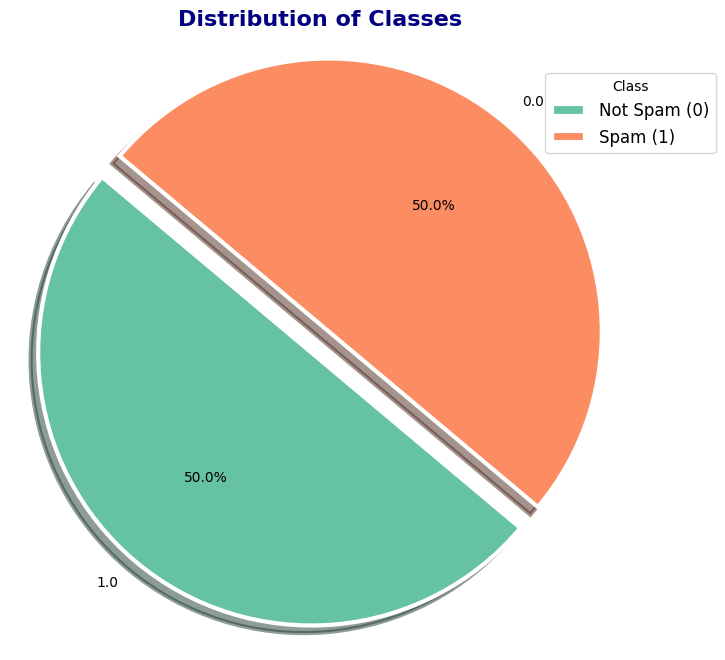

In [27]:
class_counts = df_clean['Target'].value_counts()

# Colors for the pie chart
colors = ['#66c2a5', '#fc8d62']

# Explode the second slice (1) to highlight it
explode = (0, 0.1)

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=140, colors=colors, explode=explode, shadow=True, wedgeprops={'linewidth': 3, 'edgecolor': 'white'})
plt.title('Distribution of Classes', fontsize=16, fontweight='bold', color='navy')

# Add a legend with custom formatting
plt.legend(title='Class', loc='upper left', labels=['Not Spam (0)', 'Spam (1)'], fontsize=12, bbox_to_anchor=(0.85, 0.95))

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Show the plot
plt.show()


In [28]:
df_clean.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,Target
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61.0,278.0,1.0
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101.0,1028.0,1.0
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485.0,2259.0,1.0
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40.0,191.0,1.0
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40.0,191.0,1.0


In [29]:
df_clean.shape

(5062, 58)

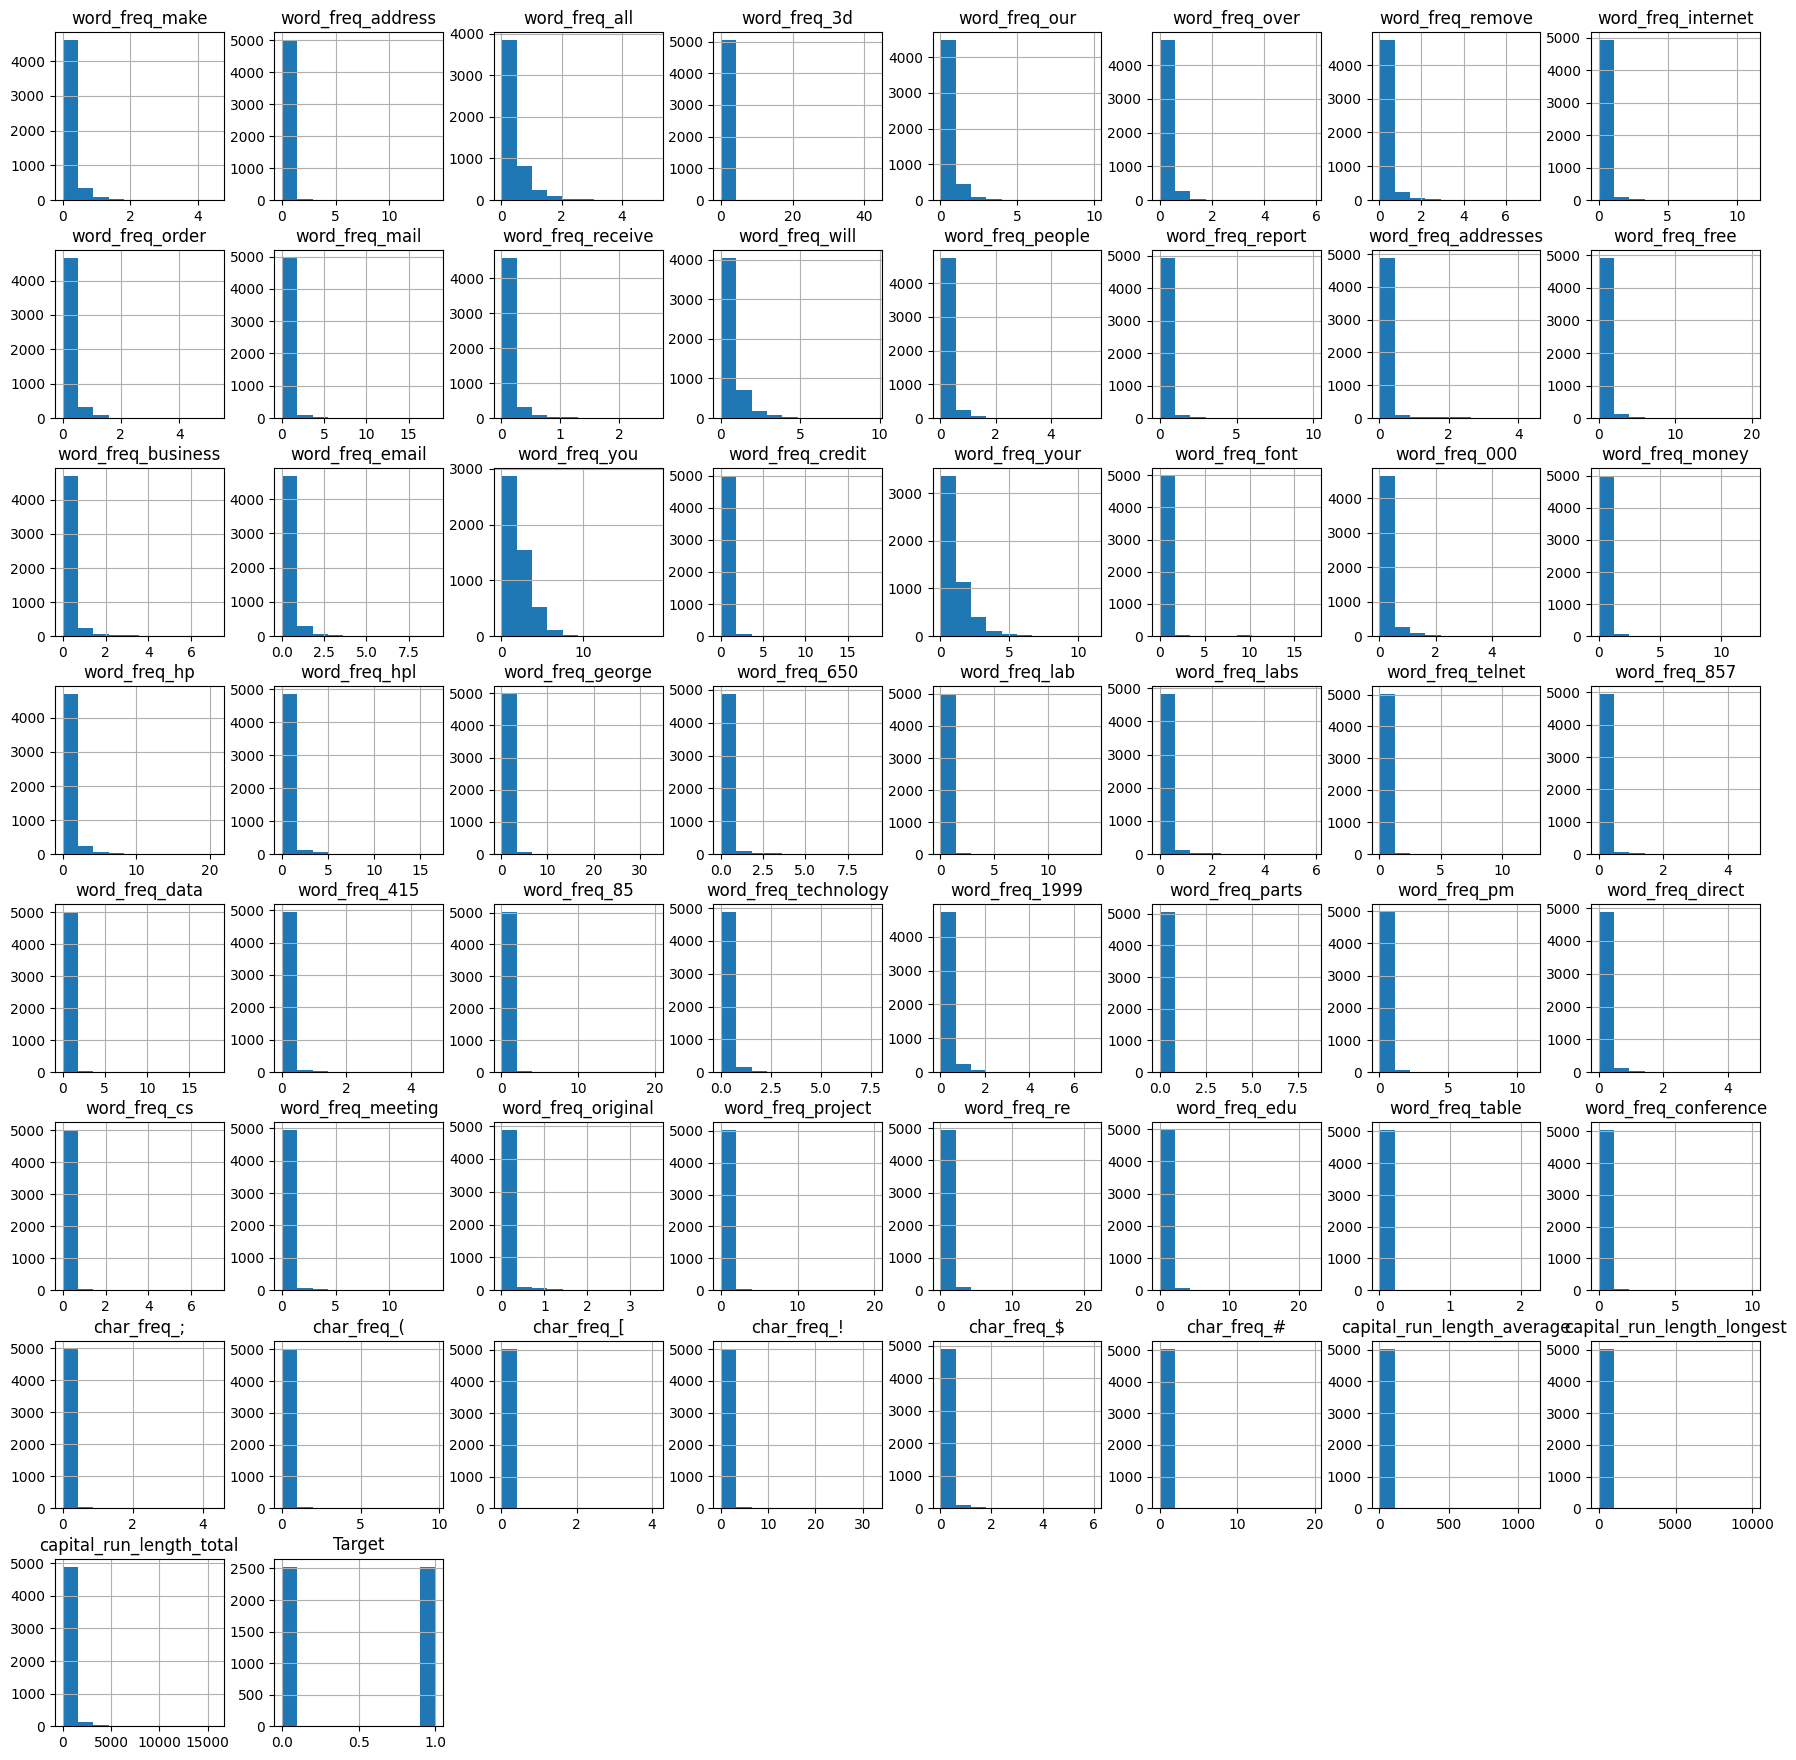

In [30]:
df_clean.hist(figsize=(22,22))
plt.show()

As seen from the histograms, most of them are skewed to the left. Indicating that the distribution is highly concentrated on the lower values.

# **4. Feature Engineering**

### Key tasks (Where applicable):
* Create relevant features that capture key information

In [31]:
# Normalize the datatset to equalize their influence on the model

# Extract features and excluding the target var
X = df_clean.drop('Target',axis=1)

# Extract the target variable (y)
y = df_clean['Target']

scaler = StandardScaler()

# Normalize the features
X_normalized = scaler.fit_transform(X)

# Covert normalized array to df
df = pd.DataFrame(X_normalized,columns=X.columns)
df['Target'] = y

In [32]:
# Verifying that the datase is normalized:
mean_values = df.mean()
std_values = df.std()

print('Mean of each feature:')
print(mean_values)
print('\nStandard deviation of each feature:')
print(std_values)

Mean of each feature:
word_freq_make                1.122944e-17
word_freq_address            -1.122944e-17
word_freq_all                -1.122944e-17
word_freq_3d                  7.018399e-18
word_freq_our                 7.860607e-17
word_freq_over                1.122944e-17
word_freq_remove              2.245888e-17
word_freq_internet           -1.684416e-17
word_freq_order               2.807360e-17
word_freq_mail               -3.088096e-17
word_freq_receive             1.684416e-17
word_freq_will               -9.545023e-17
word_freq_people             -5.614719e-18
word_freq_report             -1.544048e-17
word_freq_addresses           5.614719e-18
word_freq_free               -1.122944e-17
word_freq_business           -4.491775e-17
word_freq_email               5.053247e-17
word_freq_you                 1.122944e-17
word_freq_credit             -3.368832e-17
word_freq_your               -4.491775e-17
word_freq_font                1.403680e-17
word_freq_000                 4.

In [33]:
df.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,Target
0,-0.381476,1.188704,0.667332,-0.056624,-0.046423,-0.387736,-0.353159,-0.283884,-0.360572,-0.410883,...,-0.157901,-0.534794,-0.15836,0.563506,-0.375774,-0.115017,-0.060703,0.010196,-0.058110,1.0
1,0.318860,0.362706,0.387299,-0.056624,-0.311628,0.615444,0.154794,-0.122581,-0.360572,1.073576,...,-0.157901,-0.017900,-0.15836,0.067077,0.365283,-0.005308,-0.021608,0.208981,1.146361,1.0
2,-0.181380,-0.279737,0.807348,-0.056624,1.294335,0.292993,0.106418,-0.007364,1.818776,-0.016080,...,-0.114892,0.025175,-0.15836,-0.050305,0.381751,-0.092161,0.113898,2.117320,3.123301,1.0
3,-0.381476,-0.279737,-0.612820,-0.056624,0.410319,-0.387736,0.396677,1.167845,0.695050,0.584021,...,-0.157901,0.001680,-0.15836,-0.220265,-0.375774,-0.115017,-0.067008,-0.094167,-0.197829,1.0
4,-0.381476,-0.279737,-0.612820,-0.056624,0.410319,-0.387736,0.396677,1.167845,0.695050,0.584021,...,-0.157901,-0.006152,-0.15836,-0.222711,-0.375774,-0.115017,-0.067008,-0.094167,-0.197829,1.0


In [34]:
df.columns

Index(['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d',
       'word_freq_our', 'word_freq_over', 'word_freq_remove',
       'word_freq_internet', 'word_freq_order', 'word_freq_mail',
       'word_freq_receive', 'word_freq_will', 'word_freq_people',
       'word_freq_report', 'word_freq_addresses', 'word_freq_free',
       'word_freq_business', 'word_freq_email', 'word_freq_you',
       'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000',
       'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george',
       'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet',
       'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85',
       'word_freq_technology', 'word_freq_1999', 'word_freq_parts',
       'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting',
       'word_freq_original', 'word_freq_project', 'word_freq_re',
       'word_freq_edu', 'word_freq_table', 'word_freq_conference',


### Feature selection using: 
* ANOVA F-test
* Recursive Feature Elimination (RFE)
* L1-based regularization (Lasso)

### Anova F-test

In [35]:
X = df[['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d',
       'word_freq_our', 'word_freq_over', 'word_freq_remove',
       'word_freq_internet', 'word_freq_order', 'word_freq_mail',
       'word_freq_receive', 'word_freq_will', 'word_freq_people',
       'word_freq_report', 'word_freq_addresses', 'word_freq_free',
       'word_freq_business', 'word_freq_email', 'word_freq_you',
       'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000',
       'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george',
       'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet',
       'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85',
       'word_freq_technology', 'word_freq_1999', 'word_freq_parts',
       'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting',
       'word_freq_original', 'word_freq_project', 'word_freq_re',
       'word_freq_edu', 'word_freq_table', 'word_freq_conference',
       'char_freq_;', 'char_freq_(', 'char_freq_[', 'char_freq_!',
       'char_freq_$', 'char_freq_#', 'capital_run_length_average',
       'capital_run_length_longest', 'capital_run_length_total']]

y= df['Target']

k_best = SelectKBest(score_func=f_classif, k=10)

# Fit the feature selector to the data
k_best.fit(X, y)

# Get the indices of the selected features
selected_indices = k_best.get_support(indices=True)

# Get the names of the selected features
selected_features_anova = X.columns[selected_indices]

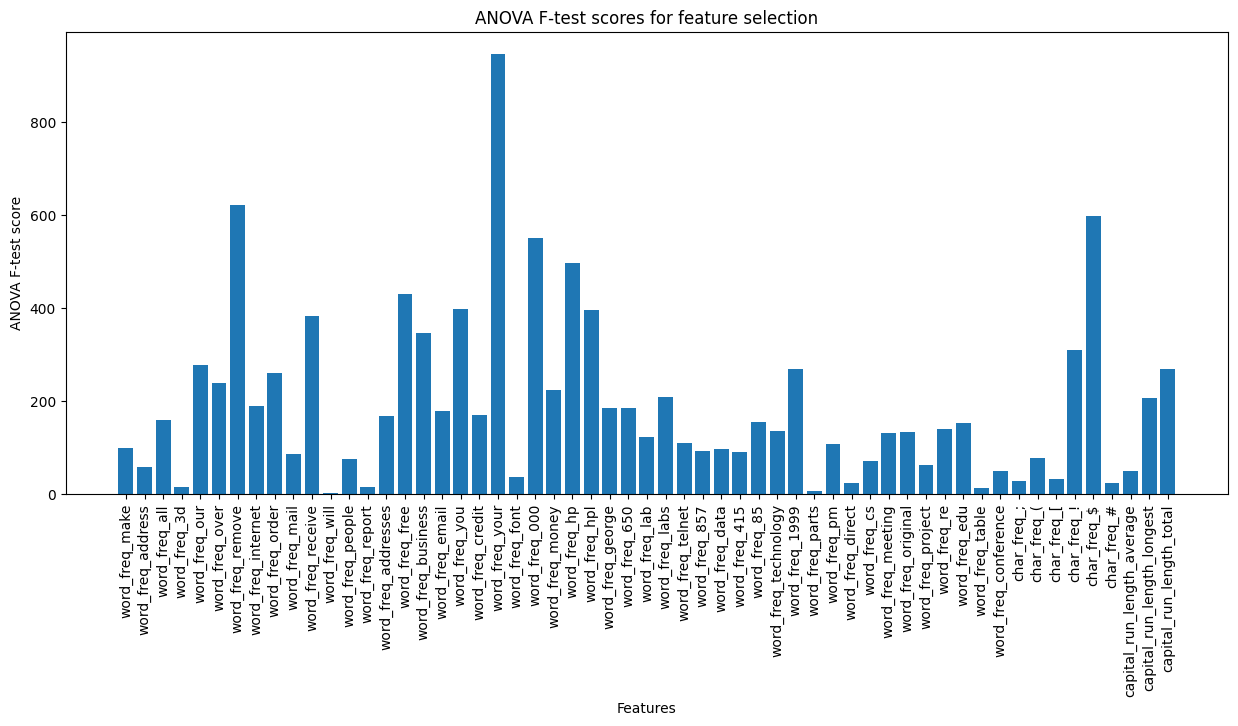

In [36]:
# Plot the ANOVA F-test scores
plt.figure(figsize=(15, 6))
plt.bar(range(len(k_best.scores_)), k_best.scores_, tick_label=X.columns)
plt.xlabel('Features')
plt.ylabel('ANOVA F-test score')
plt.title('ANOVA F-test scores for feature selection')
plt.xticks(rotation=90)
plt.show()

Higher F-test scores indicate greater importance, as these features are more likely to be informative for predicting the target variable

### Recursive Feature Elimination (RFE)
RFE is an iterative feature selection method that starts with all features and recursively removes the least important features based on the coefficients of a specified machine learning model

In [37]:
# Instantiate the model you want to use for feature selection
model = LogisticRegression()

# Instantiate RFE with the model and the desired number of features to keep
# Adjust the number of features (n_features_to_select) as needed
rfe = RFE(estimator=model, n_features_to_select=20)  # Select the top 10 features

# Fit RFE to the data
rfe.fit(X, y)

# Get the indices of the selected features
selected_indices = rfe.support_

# Get the names of the selected features
selected_features_RFE = X.columns[selected_indices]

# Print the names of the selected features
print("Selected features:")
print(selected_features_RFE)

Selected features:
Index(['word_freq_3d', 'word_freq_remove', 'word_freq_free',
       'word_freq_business', 'word_freq_credit', 'word_freq_000',
       'word_freq_hp', 'word_freq_hpl', 'word_freq_george', 'word_freq_lab',
       'word_freq_85', 'word_freq_cs', 'word_freq_meeting',
       'word_freq_project', 'word_freq_re', 'word_freq_edu',
       'word_freq_conference', 'char_freq_$', 'char_freq_#',
       'capital_run_length_longest'],
      dtype='object')


In [38]:
# Instantiate the Logistic Regression model
model = LogisticRegression()

# Instantiate RFE with the model and the desired number of features to keep
rfe = RFE(estimator=model, n_features_to_select=20)  # Adjust the number of features as needed

# Fit RFE to the data
rfe.fit(X, y)

# Get the indices of the selected features
selected_indices = rfe.support_

# Get the names of the selected features
selected_features_RFE = X.columns[selected_indices]

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X[selected_features_RFE], y, test_size=0.2, random_state=42)

# Train a Logistic Regression model using the selected features
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.912142152023692


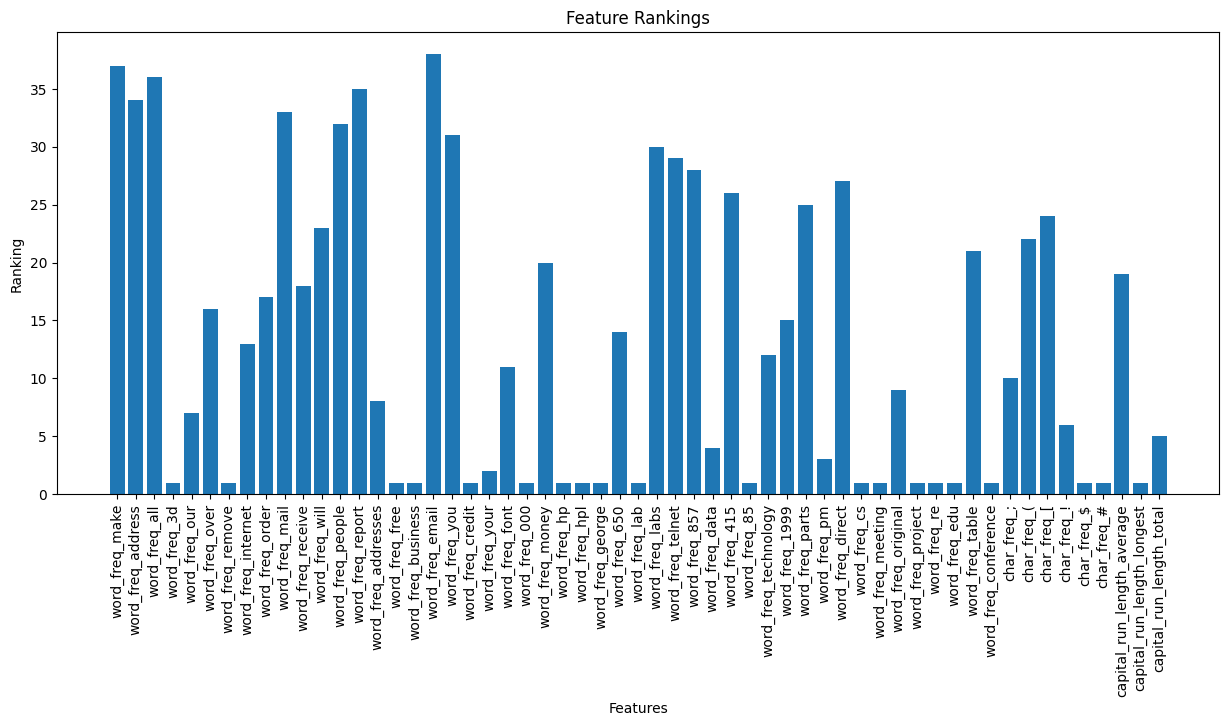

In [39]:
# Plot the feature rankings
plt.figure(figsize=(15, 6))
plt.bar(range(len(rfe.ranking_)), rfe.ranking_, tick_label=X.columns)
plt.xlabel('Features')
plt.ylabel('Ranking')
plt.title('Feature Rankings')
plt.xticks(rotation=90)
plt.show()

 Lower ranking values indicate higher importance, as these features were selected earlier during the RFE process

### L1-based regularization (Lasso)

In [40]:
logreg = LogisticRegression(penalty='l1', solver='liblinear', C=1.0)

# Instantiate SelectFromModel with logistic regression as the model
# Adjust the threshold parameter as needed to control the number of selected features
# Higher values of threshold lead to fewer selected features
sfm = SelectFromModel(estimator=logreg, threshold='median')

# Fit SelectFromModel to the data
sfm.fit(X, y)

# Get the indices of the selected features
selected_indices = sfm.get_support(indices=True)

# Get the names of the selected features
selected_features_lasso = X.columns[selected_indices]

# Print the names of the selected features
print("Selected features:")
print(selected_features_lasso)

Selected features:
Index(['word_freq_3d', 'word_freq_our', 'word_freq_remove',
       'word_freq_addresses', 'word_freq_free', 'word_freq_business',
       'word_freq_credit', 'word_freq_your', 'word_freq_000', 'word_freq_hp',
       'word_freq_hpl', 'word_freq_george', 'word_freq_lab', 'word_freq_data',
       'word_freq_85', 'word_freq_technology', 'word_freq_pm', 'word_freq_cs',
       'word_freq_meeting', 'word_freq_project', 'word_freq_re',
       'word_freq_edu', 'word_freq_conference', 'char_freq_;', 'char_freq_!',
       'char_freq_$', 'char_freq_#', 'capital_run_length_longest',
       'capital_run_length_total'],
      dtype='object')


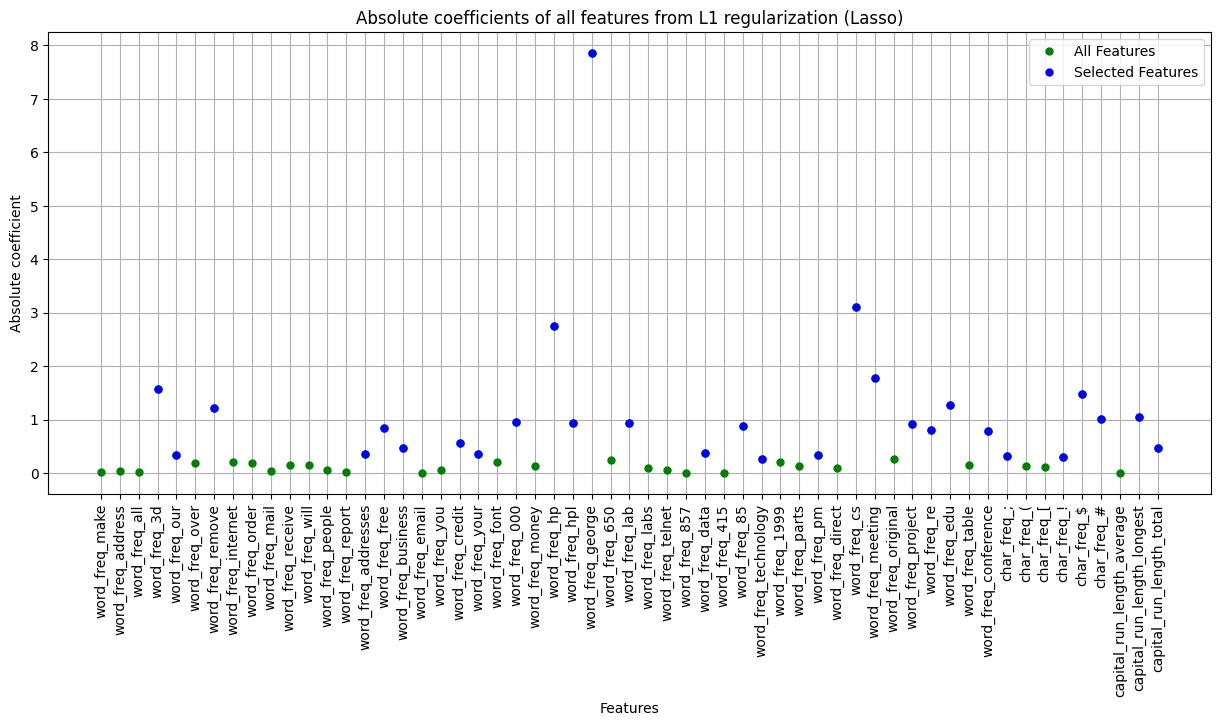

In [41]:
# Get the coefficients of all features from the logistic regression model
coefficients_all = sfm.estimator_.coef_.flatten()

# Get the coefficients of the selected features
coefficients_selected = coefficients_all[selected_indices]

# Plot the coefficients of all features with green markers
plt.figure(figsize=(15, 6))  # Adjust figure size as needed
plt.plot(np.abs(coefficients_all), marker='o', linestyle='None', markersize=5, color='green', label='All Features')

# Plot the coefficients of the selected features with blue markers
plt.plot(selected_indices, np.abs(coefficients_selected), marker='o', linestyle='None', markersize=5, color='blue', label='Selected Features')

# Set the x-axis labels to the names of all features
plt.xticks(range(len(X.columns)), X.columns, rotation=90)

plt.xlabel('Features')
plt.ylabel('Absolute coefficient')
plt.title('Absolute coefficients of all features from L1 regularization (Lasso)')
plt.legend()
plt.grid(True)
plt.show()


In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Instantiate the Logistic Regression model with L1 regularization
logreg = LogisticRegression(penalty='l1', solver='liblinear', C=1.0)

# Instantiate SelectFromModel with logistic regression as the model
# Adjust the threshold parameter as needed to control the number of selected features
# Higher values of threshold lead to fewer selected features
sfm = SelectFromModel(estimator=logreg, threshold='median')

# Fit SelectFromModel to the data
sfm.fit(X, y)

# Get the indices of the selected features
selected_indices = sfm.get_support(indices=True)

# Get the names of the selected features
selected_features_lasso = X.columns[selected_indices]

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X[selected_features_lasso], y, test_size=0.2, random_state=42)

# Train a Logistic Regression model using the selected features
logreg.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = logreg.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.912142152023692


The selected features are determined by their non-zero coefficients after applying L1 regularization (Lasso), prioritizing features that contribute to the model's predictive power while encouraging sparsity by shrinking some coefficients towards zero.

In [43]:
combined_selected_features = set(selected_features_lasso) | set(selected_features_RFE) | set(selected_features_anova)

# Convert the combined selected features to a list
combined_selected_features = list(combined_selected_features)

# Display the combined selected features
print(combined_selected_features)

['word_freq_george', 'capital_run_length_longest', 'word_freq_3d', 'word_freq_your', 'char_freq_;', 'word_freq_our', 'word_freq_technology', 'word_freq_cs', 'char_freq_#', 'word_freq_pm', 'word_freq_conference', 'word_freq_addresses', 'word_freq_you', 'char_freq_!', 'word_freq_credit', 'word_freq_project', 'word_freq_receive', 'char_freq_$', 'word_freq_edu', 'word_freq_85', 'word_freq_000', 'word_freq_hpl', 'word_freq_re', 'word_freq_hp', 'word_freq_business', 'word_freq_remove', 'word_freq_lab', 'word_freq_free', 'capital_run_length_total', 'word_freq_data', 'word_freq_meeting']


We combined the selected features from different feature selection techniques, including Lasso, RFE, and ANOVA, to leverage the strengths of each method and create a comprehensive feature set that captures the most relevant information for our model. By merging these sets, we aim to improve the model's predictive performance and robustness by incorporating diverse perspectives on feature importance and relevance.

### Before moving on to training the model. I am going to perfom Correlation-based feature selection
It helps identify and remove highly correlated features, reducing redundancy and multicollinearity in the feature set.

In [44]:
selected_features_with_target = combined_selected_features + ["Target"]

# Select only the combined selected features and the target variable from the DataFrame
df = df[selected_features_with_target]

In [45]:
df.head()

,word_freq_george,capital_run_length_longest,word_freq_3d,word_freq_your,char_freq_;,word_freq_our,word_freq_technology,word_freq_cs,char_freq_#,word_freq_pm,...,word_freq_re,word_freq_hp,word_freq_business,word_freq_remove,word_freq_lab,word_freq_free,capital_run_length_total,word_freq_data,word_freq_meeting,Target
0,-0.189551,0.010196,-0.056624,0.051632,-0.157901,-0.046423,-0.244664,-0.118661,-0.115017,-0.175538,...,-0.302000,-0.311327,-0.365392,-0.353159,-0.155536,0.034684,-0.058110,-0.169679,-0.162631,1.0
1,-0.189551,0.208981,-0.056624,0.595986,-0.157901,-0.311628,-0.244664,-0.118661,-0.005308,-0.175538,...,-0.302000,-0.311327,-0.213991,0.154794,-0.155536,-0.193926,1.146361,-0.169679,-0.162631,1.0
2,-0.189551,2.117320,-0.056624,-0.337192,-0.114892,1.294335,-0.244664,-0.118661,-0.092161,-0.175538,...,-0.239892,-0.311327,-0.235620,0.106418,-0.155536,-0.295530,3.123301,-0.169679,-0.162631,1.0
3,-0.189551,-0.094167,-0.056624,-0.510003,-0.157901,0.410319,-0.244664,-0.118661,-0.115017,-0.175538,...,-0.302000,-0.311327,-0.365392,0.396677,-0.155536,0.021984,-0.197829,-0.169679,-0.162631,1.0
4,-0.189551,-0.094167,-0.056624,-0.510003,-0.157901,0.410319,-0.244664,-0.118661,-0.115017,-0.175538,...,-0.302000,-0.311327,-0.365392,0.396677,-0.155536,0.021984,-0.197829,-0.169679,-0.162631,1.0


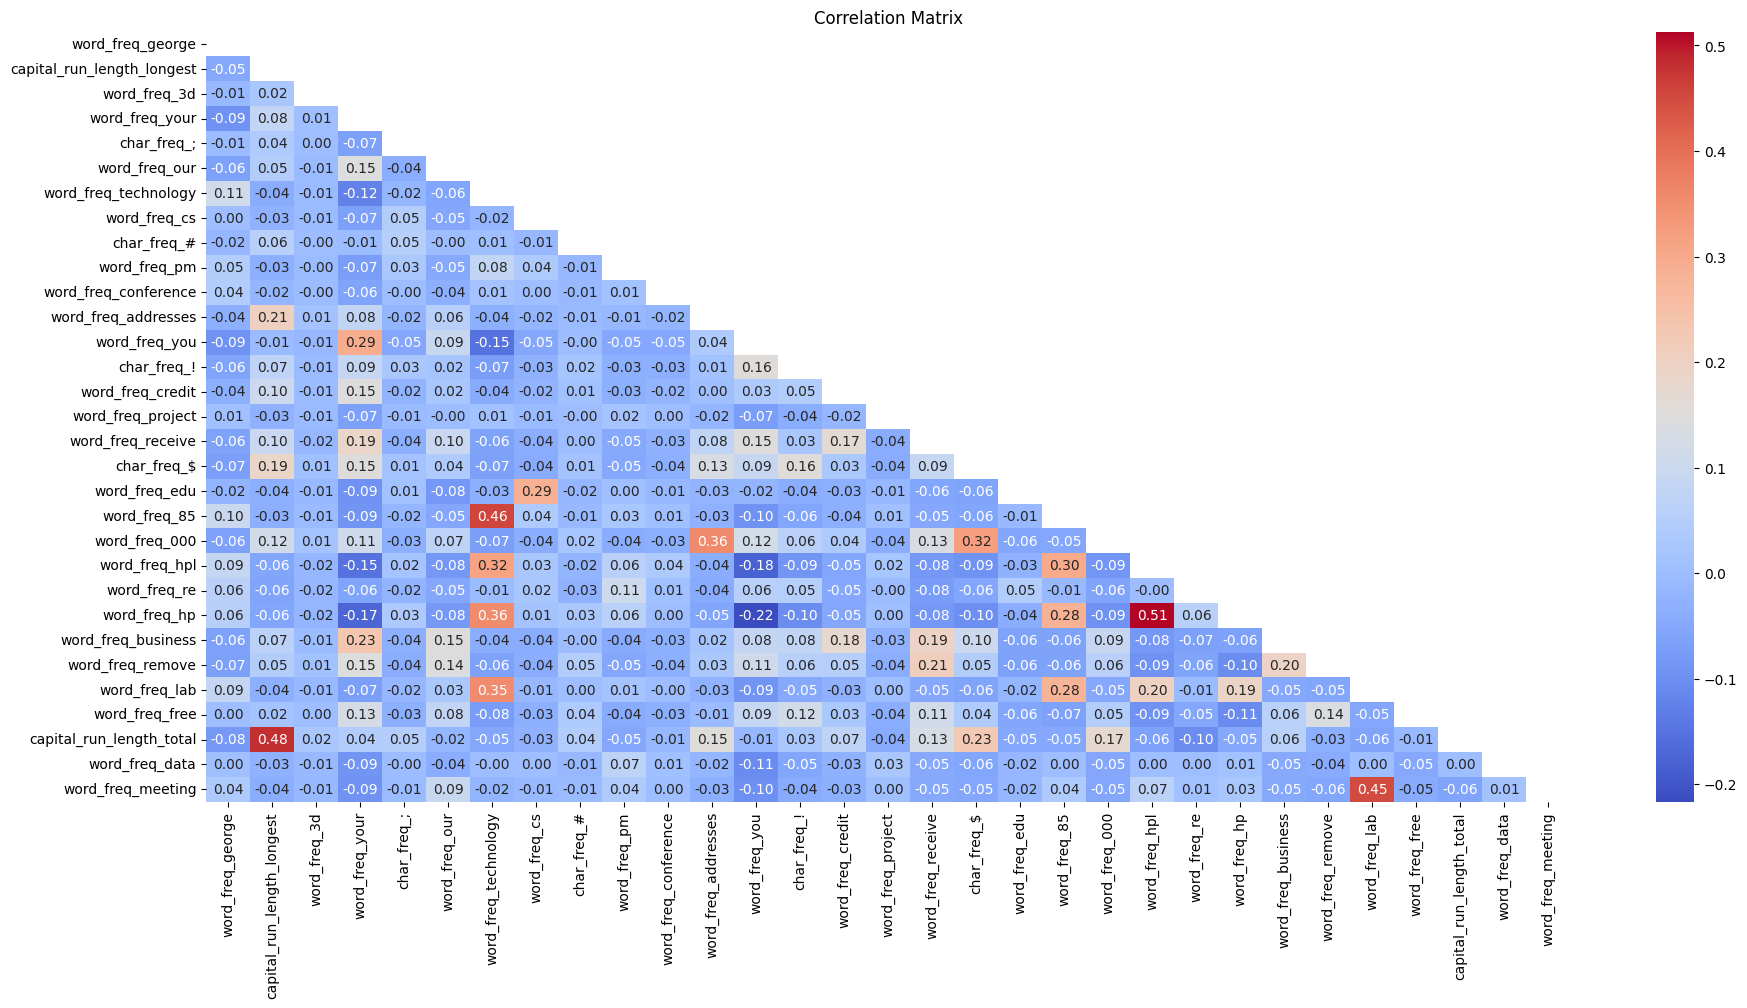

In [46]:
corr_matrix = df.drop(columns=['Target']).corr()

# Mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Plot the heatmap
plt.figure(figsize=(22, 10))
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


In [47]:
correlation_matrix = df.corr()

# Create a mask for highly correlated features
# The mask will be True for correlated pairs, and we'll keep the first feature
correlation_mask = (correlation_matrix.abs() > 0.5) & (correlation_matrix != 1)

# Identify columns (features) to drop
columns_to_drop = set()
for feature in correlation_mask.columns:
    correlated_features = correlation_mask.index[correlation_mask[feature]]
    if len(correlated_features) > 0:
        columns_to_drop.add(feature)

# Remove highly correlated columns from the DataFrame
df = df.drop(columns=columns_to_drop)

## Threshold Selection for Filtering Highly Correlated Features

In the analysis, I decided to set a threshold of 0.5 for filtering highly correlated features. This decision was based on several considerations:

1. **Balance between Correlation Strength and Feature Retention**: A threshold of 0.5 strikes a balance between capturing moderately strong correlations and retaining a sufficient number of features for analysis. Features with correlation coefficients above 0.5 are considered moderately correlated and may contain redundant information, which could potentially lead to multicollinearity issues in modeling.

2. **Alignment with Best Practices**: While there is no universally accepted threshold for filtering highly correlated features, a threshold of 0.5 aligns with common practices in the literature and is often used as a starting point for feature selection and dimensionality reduction tasks.

3. **Domain Knowledge**: Domain-specific knowledge plays a crucial role in determining the appropriate threshold. In this analysis, a threshold of 0.5 was deemed suitable based on an understanding of the problem domain and the relationships between the variables.

4. **Model Performance Consideration**: The selected threshold aims to strike a balance between reducing multicollinearity and preserving important information for modeling. It allows for the removal of highly correlated features that may not contribute significantly to predictive performance while retaining features with distinct information.



# **5. Model Training and Evaluation**

### Key tasks (Where applicable):

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Step 1: Split the dataset into training, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['Target']), df['Target'], test_size=0.2, random_state=42)

# Step 2: Train each model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)

lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)

# Step 3: Evaluate models on the test set
rf_test_preds = rf_model.predict(X_test)
svm_test_preds = svm_model.predict(X_test)
lr_test_preds = lr_model.predict(X_test)

rf_test_accuracy = accuracy_score(y_test, rf_test_preds)
svm_test_accuracy = accuracy_score(y_test, svm_test_preds)
lr_test_accuracy = accuracy_score(y_test, lr_test_preds)

# Step 4: Choose the best model based on test set performance
best_model = None
best_accuracy = 0

if rf_test_accuracy > best_accuracy:
    best_model = rf_model
    best_accuracy = rf_test_accuracy

if svm_test_accuracy > best_accuracy:
    best_model = svm_model
    best_accuracy = svm_test_accuracy

if lr_test_accuracy > best_accuracy:
    best_model = lr_model
    best_accuracy = lr_test_accuracy

print(f"The best model is {best_model.__class__.__name__} with test accuracy: {best_accuracy:.4f}")


The best model is RandomForestClassifier with test accuracy: 0.9329


In [49]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Step 5: Calculate additional evaluation metrics
rf_precision = precision_score(y_test, rf_test_preds)
rf_recall = recall_score(y_test, rf_test_preds)
rf_f1_score = f1_score(y_test, rf_test_preds)

svm_precision = precision_score(y_test, svm_test_preds)
svm_recall = recall_score(y_test, svm_test_preds)
svm_f1_score = f1_score(y_test, svm_test_preds)

lr_precision = precision_score(y_test, lr_test_preds)
lr_recall = recall_score(y_test, lr_test_preds)
lr_f1_score = f1_score(y_test, lr_test_preds)

# Step 6: Present evaluation metrics in a table
import pandas as pd

data = {
    "Model": ["Random Forest", "Support Vector Machine", "Logistic Regression"],
    "Accuracy": [rf_test_accuracy, svm_test_accuracy, lr_test_accuracy],
    "Precision": [rf_precision, svm_precision, lr_precision],
    "Recall": [rf_recall, svm_recall, lr_recall],
    "F1 Score": [rf_f1_score, svm_f1_score, lr_f1_score]
}

df_metrics = pd.DataFrame(data)

print(df_metrics)


                    Model  Accuracy  Precision    Recall  F1 Score
0           Random Forest  0.932873   0.942801  0.924565  0.933594
1  Support Vector Machine  0.911155   0.929577  0.893617  0.911243
2     Logistic Regression  0.904245   0.925101  0.883946  0.904055


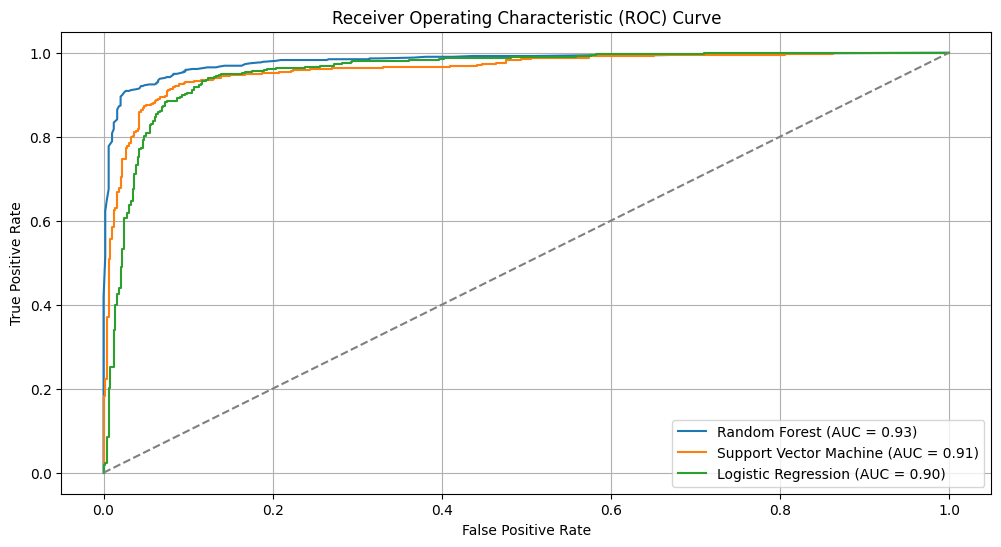

In [50]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Step 7: Plot ROC curve for each model
plt.figure(figsize=(12, 6))

# Random Forest
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_model.predict_proba(X_test)[:, 1])
plt.plot(rf_fpr, rf_tpr, label=f"Random Forest (AUC = {roc_auc_score(y_test, rf_test_preds):.2f})")

# Support Vector Machine
svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_model.decision_function(X_test))
plt.plot(svm_fpr, svm_tpr, label=f"Support Vector Machine (AUC = {roc_auc_score(y_test, svm_test_preds):.2f})")

# Logistic Regression
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_model.predict_proba(X_test)[:, 1])
plt.plot(lr_fpr, lr_tpr, label=f"Logistic Regression (AUC = {roc_auc_score(y_test, lr_test_preds):.2f})")

# Plot ROC curve for random guessing (no skill)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid(True)
plt.show()